<a href="https://colab.research.google.com/github/pushkarchaudhary/ProdigyInfotech_Machine-Learning/blob/main/Task2K_means_Customer_Segretion_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sample Data:
    CustomerID  AnnualIncome  SpendingScore
0           1         15000             30
1           2         18000             60
2           3         24000             45
3           4         30000             80
4           5         35000             75
5           6         40000             90
6           7         12000             20
7           8         22000             50
8           9         28000             65
9          10         32000             85


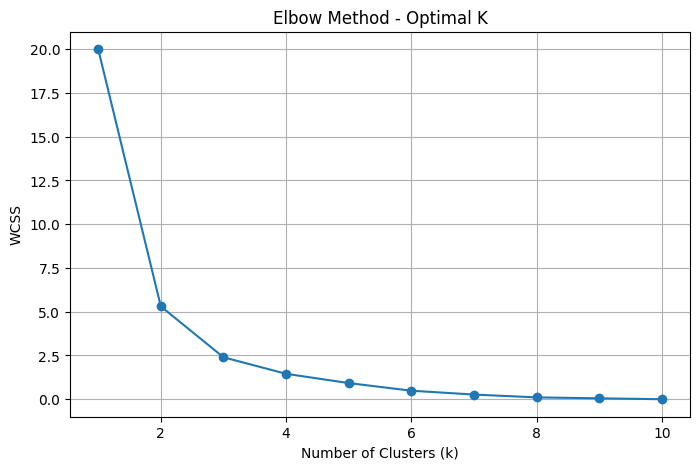


Customer Segmentation Result:
    CustomerID  AnnualIncome  SpendingScore  Cluster
0           1         15000             30        1
1           2         18000             60        0
2           3         24000             45        0
3           4         30000             80        2
4           5         35000             75        2
5           6         40000             90        2
6           7         12000             20        1
7           8         22000             50        0
8           9         28000             65        0
9          10         32000             85        2


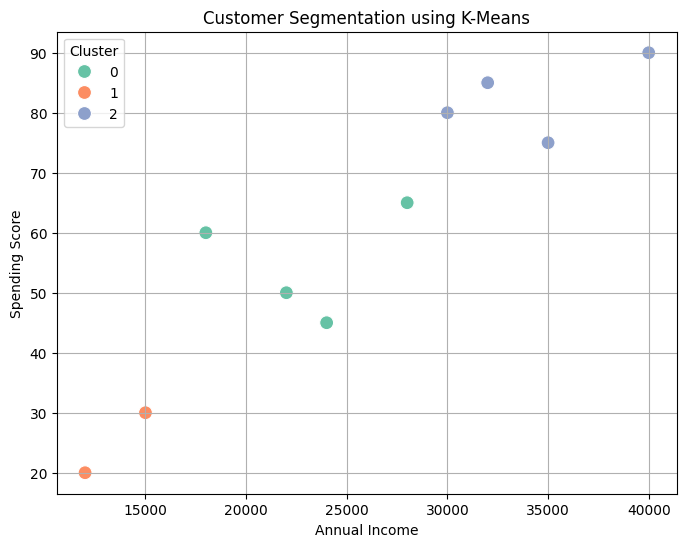

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 2: Create Sample Dataset (You can replace with your CSV data)
data = {
    'CustomerID': range(1, 11),
    'AnnualIncome': [15000, 18000, 24000, 30000, 35000, 40000, 12000, 22000, 28000, 32000],
    'SpendingScore': [30, 60, 45, 80, 75, 90, 20, 50, 65, 85]  # e.g., 0-100 score
}

df = pd.DataFrame(data)
print("Sample Data:\n", df)

# Step 3: Select Features for Clustering
X = df[['AnnualIncome', 'SpendingScore']]

# Step 4: Feature Scaling (K-means performs better on scaled data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Determine Optimal Number of Clusters using Elbow Method
wcss = []  # Within-Cluster Sum of Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method - Optimal K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

# Step 6: Apply K-means with Optimal Clusters (choose k=3 for this example)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

print("\nCustomer Segmentation Result:\n", df)

# Step 7: Visualize the Clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x='AnnualIncome', y='SpendingScore', hue='Cluster', data=df, palette='Set2', s=100)
plt.title("Customer Segmentation using K-Means")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()
